What we want to do is find optimal placement for a restaurant in Los Angeles.  However, restaurants are a dime a dozen, so placement is essential and will rely on categorization and a lot of plotting on a map.
To begin the project, we must import some necessary libraries.

In [3]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
import folium # map rendering library
from bs4 import BeautifulSoup
import csv
import folium # Map plotting library
import numpy as np
from pandas import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')


Libraries imported.


In [20]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_districts_and_neighborhoods_in_Los_Angeles').text 
soup = BeautifulSoup(source, 'lxml')
csv_file = open('Los_Angeles.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighborhood'])

14

In [21]:
catgrp = soup.find_all(class_ = "mw-category-group")

length = len(catgrp) 

for i in range(1, length):  # Gets all neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') 
        csv_writer.writerow([nbd]) 

In [28]:
csv_file.close()   
Los_Angeles_NB = pd.read_csv('Los_Angeles.csv')
Los_Angeles_NB

,Neighborhood
0,Angelino Heights
1,Angeles Mesa
2,Angelus Vista
3,Arleta
4,Arlington Heights
5,Arts District
6,Atwater Village
7,Baldwin Hills
8,Baldwin Hills/Crenshaw
9,Baldwin Village


This is way more neighborhoods than I thought there would be, but let's see if this will work.  The next step will be to geolocate the neighborhoods.

In [34]:
import geocoder # to get longitude and latitude
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighborhoods table
neighborhoods = Los_Angeles_NB['Neighborhood']

# Store latitude and longitude values in lat and lng
for nh in neighborhoods:
    g = geocoder.arcgis('{}, Los Angeles, CA'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [35]:
LA_Neighborhoods = Los_Angeles_NB
LA_Neighborhoods['Latitude'] = lat
LA_Neighborhoods['Longitude'] = lng
LA_Neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,Angelino Heights,34.070290,-118.254800
1,Angeles Mesa,32.764074,-116.986171
2,Angelus Vista,34.087575,-118.267156
3,Arleta,34.249050,-118.433490
4,Arlington Heights,34.039890,-118.325160


In [36]:
LA_Neighborhoods

,Neighborhood,Latitude,Longitude
0,Angelino Heights,34.070290,-118.254800
1,Angeles Mesa,32.764074,-116.986171
2,Angelus Vista,34.087575,-118.267156
3,Arleta,34.249050,-118.433490
4,Arlington Heights,34.039890,-118.325160
5,Arts District,34.041952,-118.236385
6,Atwater Village,34.119700,-118.258870
7,Baldwin Hills,34.021570,-118.367650
8,Baldwin Hills/Crenshaw,34.010428,-118.336776
9,Baldwin Village,34.070445,-118.200710


Phase II: Utilizing FourSquare Engine

We must access FourSquare to locate venues in these neighborhoods and properly categorize them.
First, let's save the completed geolocated coordinates.

In [38]:
LA_Neighborhoods.to_csv(r'E:\Data Analytics\Coursework\Capstone\geolocated.csv')

This cell is private

In [6]:
print('Your credentails:')
print('CLIENT_ID: ' + "G14 CLASSIFIED")
print('CLIENT_SECRET:' + "G14 CLASSIFIED")

Your credentails:
CLIENT_ID: G14 CLASSIFIED
CLIENT_SECRET:G14 CLASSIFIED


<h> Next we need to write a script that will extract the categories from Foursquare venues.  Then we'll apply our API in all the LA neighborhoods.  </h>

In [7]:
# We neeed the names of the categories first
def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
explore_df_list = []

for i, nhood_name in enumerate(LA_Neighborhoods['Neighborhood']):  
    
    try :
        #Get Neighborhood data
        nhood_name = LA_Neighborhoods.loc[i, 'Neighborhood']
        nhood_lat = LA_Neighborhoods.loc[i, 'Latitude']
        nhood_lng = LA_Neighborhoods.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 60 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass


In [8]:
LA_Venues = pd.DataFrame([item for item in explore_df_list])
LA_Venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
LA_Venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Angelino Heights,34.07029,-118.2548,Halliwell Manor,Performing Arts Venue,34.069329,-118.254165
1,Angelino Heights,34.07029,-118.2548,Guisados,Taco Place,34.070262,-118.250437
2,Angelino Heights,34.07029,-118.2548,Eightfold Coffee,Coffee Shop,34.071245,-118.250698
3,Angelino Heights,34.07029,-118.2548,Tsubaki,Japanese Restaurant,34.072938,-118.251298
4,Angelino Heights,34.07029,-118.2548,Subliminal Projects,Art Gallery,34.072290,-118.250737


Let's save all this good data

In [9]:
LA_Venues.to_csv(r'E:\Data Analytics\Coursework\Capstone\LA_Venues.csv')

The data is substantial, almost 9k entries, so I want to put it in a pivot table to analyze the frequency of the different types of venues.

In [6]:
LA_Venues_Pivot = pd.get_dummies(LA_Venues[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
LA_Venues_Pivot['Neighborhood'] = LA_Venues['Neighborhood'] 


# Move neighborhood column to the front of the dataframe
mid = LA_Venues_Pivot['Neighborhood']
LA_Venues_Pivot.drop(labels=['Neighborhood'], axis=1,inplace = True)
LA_Venues_Pivot.insert(0, 'Neighborhood', mid)
LA_Venues_Pivot

LA_Venues_Pivot.head()

,Neighborhood,ATM,Acai House,Accessories Store,Adult Boutique,Airport,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Bookstore,College Classroom,College Football Field,College Gym,College Quad,College Residence Hall,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Marijuana Dispensary,Marine Terminal,Market,Martial Arts School,Massage Studio,Mattress Store,Medical School,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Night Market,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Observatory,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreat

Next, we should count the venues by neighborhood in order to find out which venues are the most common.  After all, we don't want to make a pizza place in the same neighborhood as ten other pizza places.  

In [7]:
LA_Common_Venues = LA_Venues_Pivot.groupby('Neighborhood').mean().reset_index()
LA_Common_Venues.head()

,Neighborhood,ATM,Acai House,Accessories Store,Adult Boutique,Airport,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Bookstore,College Classroom,College Football Field,College Gym,College Quad,College Residence Hall,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Marijuana Dispensary,Marine Terminal,Market,Martial Arts School,Massage Studio,Mattress Store,Medical School,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Night Market,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Observatory,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreat

Now let's find the most common venues

In [8]:
def most_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

Let's set a standard for the most common venues -- let's find the 15 most common venues.

In [9]:
common_venues = 15
indicators = ['st', 'nd', 'rd']

# Create columns according to number of the most common venues
columns = ['Neighborhood']
for ind in np.arange(common_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe to house our new list standard
Most_Common_List = pd.DataFrame(columns=columns)
Most_Common_List['Neighborhood'] = LA_Common_Venues['Neighborhood']

for ind in np.arange(LA_Common_Venues.shape[0]):
    Most_Common_List.iloc[ind, 1:] = most_common_venues(LA_Common_Venues.iloc[ind, :], common_venues)

Most_Common_List.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Angeles Mesa,Business Service,Mountain,Amphitheater,Zoo,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
1,Angelino Heights,Coffee Shop,Bar,Mexican Restaurant,Taco Place,Japanese Restaurant,Park,Art Gallery,Breakfast Spot,American Restaurant,Hot Dog Joint,Café,Massage Studio,Burger Joint,Food Truck,Music Venue
2,Angelus Vista,Coffee Shop,Mexican Restaurant,Bakery,Salon / Barbershop,Japanese Restaurant,Cuban Restaurant,Thai Restaurant,Poke Place,Ice Cream Shop,Reservoir,Record Shop,Bar,Burmese Restaurant,Recreation Center,Seafood Restaurant
3,Arleta,Mexican Restaurant,Cuban Restaurant,Home Service,Liquor Store,Child Care Service,Pizza Place,Fast Food Restaurant,Historic Site,Juice Bar,Taco Place,Bus Station,Spa,Filipino Restaurant,Fabric Shop,Ethiopian Restaurant
4,Arlington Heights,Rental Car Location,Liquor Store,Karaoke Bar,Grocery Store,Vegetarian / Vegan Restaurant,Latin American Restaurant,Mexican Restaurant,Intersection,Korean Restaurant,Bakery,Park,Coffee Shop,Dance Studio,Shopping Mall,Sushi Restaurant


To ascertain the appropriate placement of our new restaurant, we must use K-Means clustering on this data set.

In [10]:
Cluster_Venues = LA_Common_Venues.drop('Neighborhood', 1)
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()


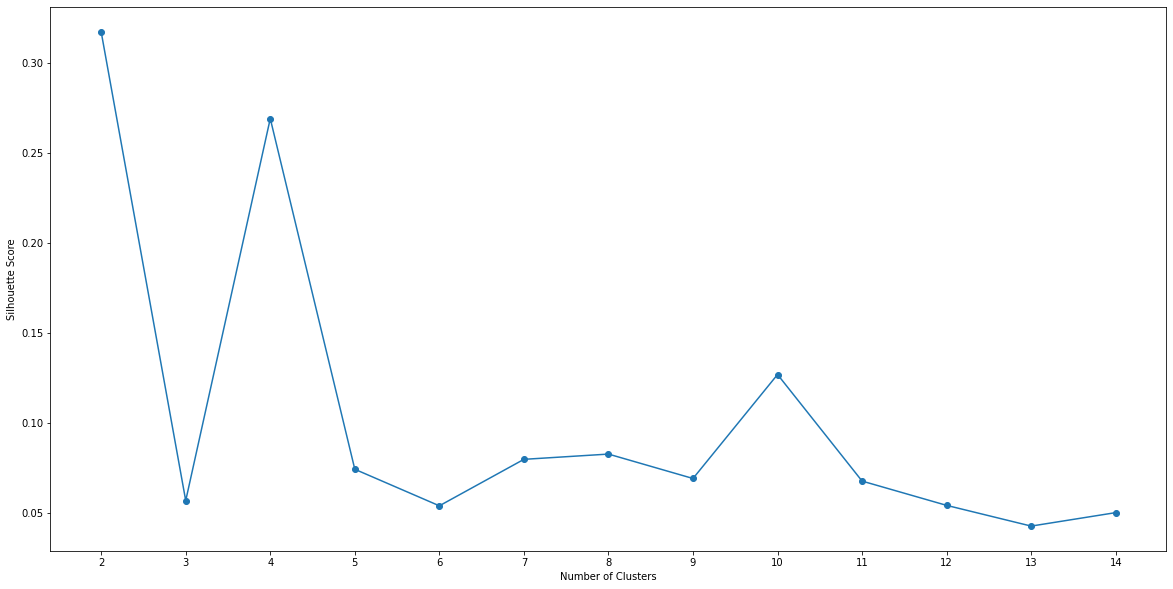

In [11]:
max_range = 15 #Max range 15 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
indices = []
scores = []

for LA_Venues_Cluster in range(2, max_range) :
    LA_RC = Cluster_Venues
    kmeans = KMeans(n_clusters = LA_Venues_Cluster, init = 'k-means++', random_state = 0).fit_predict(LA_RC)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(LA_RC, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(LA_Venues_Cluster)
    scores.append(score)
    
plot(max_range, scores, "Number of Clusters", "Silhouette Score")

The optimal number looks to be 13 using Elbow method.

In [12]:
Best_value = 13

With the best number of clusters as 13, we can start with the actual K-Means clustering.

In [24]:
LA_clusters = Best_value
# k-means
kmeans = KMeans(n_clusters = LA_Venues_Cluster, init = 'k-means++', random_state = 0).fit(LA_RC)
# Add labels
Most_Common_List.insert(0, 'Cluster Labels', kmeans.labels_)
# integrated dataframe with all pertinent information
LA_cluster_final = LA_Neighborhoods
LA_cluster_final = LA_cluster_final.join(Most_Common_List.set_index('Neighborhood'), on='Neighborhood')
LA_cluster_final.dropna(inplace = True)
LA_cluster_final.head()

,Unnamed: 0,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,0,Angelino Heights,34.070290,-118.254800,13,Coffee Shop,Bar,Mexican Restaurant,Taco Place,Japanese Restaurant,Park,Art Gallery,Breakfast Spot,American Restaurant,Hot Dog Joint,Café,Massage Studio,Burger Joint,Food Truck,Music Venue
1,1,Angeles Mesa,32.764074,-116.986171,12,Business Service,Mountain,Amphitheater,Zoo,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
2,2,Angelus Vista,34.087575,-118.267156,0,Coffee Shop,Mexican Restaurant,Bakery,Salon / Barbershop,Japanese Restaurant,Cuban Restaurant,Thai Restaurant,Poke Place,Ice Cream Shop,Reservoir,Record Shop,Bar,Burmese Restaurant,Recreation Center,Seafood Restaurant
3,3,Arleta,34.249050,-118.433490,8,Mexican Restaurant,Cuban Restaurant,Home Service,Liquor Store,Child Care Service,Pizza Place,Fast Food Restaurant,Historic Site,Juice Bar,Taco Place,Bus Station,Spa,Filipino Restaurant,Fabric Shop,Ethiopian Restaurant
4,4,Arlington Heights,34.039890,-118.325160,2,Rental Car Location,Liquor Store,Karaoke Bar,Grocery Store,Vegetarian / Vegan Restaurant,Latin American Restaurant,Mexican Restaurant,Intersection,Korean Restaurant,Bakery,Park,Coffee Shop,Dance Studio,Shopping Mall,Sushi Restaurant


A little cleanup.

In [30]:
# Drop first column of dataframe
LA_cluster_final = LA_cluster_final.iloc[: , 1:]

Now let's do a visualization using Folium

In [26]:
map_cluster = folium.Map(location=[latitude, longitude], zoom_start=15)

# Setup color scheme for different sets of clusters
x =  np.arange(LA_clusters)
ys =  [i + x + (i*x)**2 for i in range(LA_clusters)]
colors_array  =  cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow  =  [colors.rgb2hex(i) for i in colors_array]

marker_colors = []
for lat, lon, poi, cluster in zip(LA_cluster_final['Latitude'], LA_cluster_final['Longitude'], LA_cluster_final['Neighborhood'], 
                                  LA_cluster_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_cluster.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_cluster

Let's examine each cluster and see where the "vacuum" of a particular kind of restaurant might be.  That will be the most ideal placement for our new establlishment.

In [53]:
val = 1
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(4, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
2,Angelus Vista,Coffee Shop,Mexican Restaurant,Bakery,Salon / Barbershop,Japanese Restaurant,Cuban Restaurant,Thai Restaurant,Poke Place,Ice Cream Shop,Reservoir,Record Shop,Bar,Burmese Restaurant,Recreation Center,Seafood Restaurant
6,Atwater Village,Food Truck,Mediterranean Restaurant,Pizza Place,Bakery,Juice Bar,Gym,Coffee Shop,Vietnamese Restaurant,Boutique,Bookstore,Restaurant,Liquor Store,Gaming Cafe,Taco Place,Fast Food Restaurant
8,Baldwin Hills/Crenshaw,Mobile Phone Shop,Southern / Soul Food Restaurant,Cosmetics Shop,Bank,Mexican Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Fast Food Restaurant,Department Store,Lingerie Store,Wings Joint,Chinese Restaurant,Cupcake Shop,Shoe Store
11,Beachwood Canyon,Thai Restaurant,Nightclub,Café,Donut Shop,Bar,Cocktail Bar,Burger Joint,Japanese Restaurant,Ice Cream Shop,American Restaurant,Pizza Place,Music Venue,Hotel,Record Shop,Furniture / Home Store
12,"Bel Air, Bel-Air or Bel Air Estates",American Restaurant,Coffee Shop,Lingerie Store,Grocery Store,Dessert Shop,Salon / Barbershop,Mexican Restaurant,Clothing Store,Big Box Store,New American Restaurant,Noodle House,Sushi Restaurant,Supplement Shop,Restaurant,Fried Chicken Joint
17,Beverly Hills Post Office,Italian Restaurant,Arts & Crafts Store,Coffee Shop,Bookstore,Cosmetics Shop,Candy Store,Mexican Restaurant,Flower Shop,Café,Food & Drink Shop,Fountain,Men's Store,Sporting Goods Shop,Mediterranean Restaurant,French Restaurant
29,Canterbury Knolls,Clothing Store,Cosmetics Shop,Bakery,Coffee Shop,Warehouse Store,Fast Food Restaurant,Electronics Store,Sandwich Place,Furniture / Home Store,Pet Store,Pizza Place,Video Game Store,Food Court,Music Store,Candy Store
34,Century City,Hotel,Mexican Restaurant,Roof Deck,Coffee Shop,Department Store,Pizza Place,Movie Theater,Cosmetics Shop,Park,Café,Chinese Restaurant,Salad Place,Italian Restaurant,Bubble Tea Shop,Food Service
37,Cheviot Hills,Gym / Fitness Center,Sandwich Place,Convenience Store,Indonesian Restaurant,Pizza Place,Italian Restaurant,Coffee Shop,Mexican Restaurant,Grocery Store,Sports Bar,Automotive Shop,Park,Paper / Office Supplies Store,Café,Bar
38,Chinatown,Chinese Restaurant,Vietnamese Restaurant,Bakery,Plaza,Coffee Shop,Mexican Restaurant,Bar,Theater,Café,Sandwich Place,Taiwanese Restaurant,Taco Place,Bookstore,Deli / Bodega,Fried Chicken Joint


In [54]:
val = 2
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(4, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
13,Benedict Canyon,Historic Site,History Museum,Hotel,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Zoo
16,Beverly Grove,Historic Site,History Museum,Vineyard,Zoo,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market


In [55]:
val = 3
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(4, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
4,Arlington Heights,Rental Car Location,Liquor Store,Karaoke Bar,Grocery Store,Vegetarian / Vegan Restaurant,Latin American Restaurant,Mexican Restaurant,Intersection,Korean Restaurant,Bakery,Park,Coffee Shop,Dance Studio,Shopping Mall,Sushi Restaurant
7,Baldwin Hills,Food Truck,Coffee Shop,Fast Food Restaurant,Mexican Restaurant,Burger Joint,Clothing Store,Garden,Light Rail Station,Candy Store,Park,Bakery,Sandwich Place,Marijuana Dispensary,Big Box Store,Pharmacy
18,Beverly Park,Fast Food Restaurant,Mexican Restaurant,Coffee Shop,Liquor Store,Sandwich Place,Massage Studio,Theater,Music Venue,Asian Restaurant,Park,Taco Place,Bike Rental / Bike Share,Supermarket,Steakhouse,Fried Chicken Joint
20,Boyle Heights,Mexican Restaurant,Fast Food Restaurant,Bakery,Burger Joint,Chinese Restaurant,Fried Chicken Joint,Pizza Place,Theater,Convenience Store,Gym,Intersection,Grocery Store,Liquor Store,Sandwich Place,Taco Place
25,Brookside,Grocery Store,Convenience Store,Clothing Store,Toy / Game Store,Mexican Restaurant,Baseball Field,Motel,Burger Joint,Intersection,Food,Fish Market,Fabric Shop,Escape Room,Ethiopian Restaurant,Food & Drink Shop
28,Canoga Park,Indian Restaurant,Mexican Restaurant,Fast Food Restaurant,Convenience Store,Bakery,Automotive Shop,Thrift / Vintage Store,Donut Shop,Rental Car Location,Burger Joint,Asian Restaurant,Thai Restaurant,Pharmacy,Bank,Coffee Shop
31,Castle Heights,Mexican Restaurant,Automotive Shop,Boutique,Pizza Place,Dessert Shop,Coffee Shop,Cosmetics Shop,Sandwich Place,Pharmacy,Gas Station,Grocery Store,Lawyer,Chinese Restaurant,Food,Empanada Restaurant
35,Chatsworth,Pizza Place,Fast Food Restaurant,Sushi Restaurant,Mexican Restaurant,Thai Restaurant,Shipping Store,Sandwich Place,Beer Bar,Steakhouse,Bakery,Bagel Shop,Coffee Shop,Supermarket,Rock Club,Train Station
36,Chesterfield Square,Fried Chicken Joint,Park,Pizza Place,Hardware Store,Juice Bar,Mediterranean Restaurant,Coffee Shop,Sandwich Place,Mexican Restaurant,Grocery Store,Breakfast Spot,Pet Store,Pharmacy,Mobile Phone Shop,Restaurant
39,Civic Center,Mexican Restaurant,Sandwich Place,Fast Food Restaurant,Pizza Place,Clothing Store,Women's Store,Burger Joint,American Restaurant,Gym,Bank,Discount Store,Coffee Shop,Sushi Restaurant,ATM,Thrift / Vintage Store


In [56]:
val = 4
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(4, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
14,Beverly Crest,Park,Other Great Outdoors,Zoo,Indie Theater,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


In [57]:
val = 5
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(4, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
89,Koreatown,Korean Restaurant,Restaurant,Ice Cream Shop,Coffee Shop,Mexican Restaurant,Seafood Restaurant,Japanese Restaurant,Spa,Bar,Grocery Store,Thai Restaurant,Lounge,Steakhouse,Burger Joint,Speakeasy
109,Mid-Wilshire,Korean Restaurant,Coffee Shop,Bakery,Bubble Tea Shop,Bar,Food Truck,Asian Restaurant,Japanese Restaurant,Sandwich Place,Seafood Restaurant,Ice Cream Shop,Dumpling Restaurant,Hotel Bar,Thai Restaurant,Plaza
156,Sunset Junction,Korean Restaurant,Coffee Shop,Latin American Restaurant,Japanese Restaurant,Thai Restaurant,Spa,Seafood Restaurant,Asian Restaurant,Convenience Store,Playground,Supermarket,Bowling Alley,Bubble Tea Shop,Snack Place,Sandwich Place
195,Wilshire Center,Korean Restaurant,Coffee Shop,Bakery,Bar,Asian Restaurant,Food Truck,Seafood Restaurant,Sandwich Place,Bubble Tea Shop,Ice Cream Shop,Japanese Restaurant,Dumpling Restaurant,Clothing Store,Donut Shop,Dive Bar


In [58]:
val = 6
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(4, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
95,Laurel Canyon,Music Venue,Nature Preserve,Mountain,Gym / Fitness Center,Dog Run,Historic Site,Scenic Lookout,Farm,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop


In [59]:
val = 7
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(4, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
15,Beverly Glen,Playground,Garden,Gym,Park,Scenic Lookout,Shopping Plaza,Film Studio,Filipino Restaurant,English Restaurant,Flea Market,Fish Market,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service
30,Carthay,Park,Food Truck,Pilates Studio,Skate Park,Trail,Bubble Tea Shop,Fish Market,Fish & Chips Shop,Entertainment Service,Food,Escape Room,Flower Shop,Ethiopian Restaurant,Event Service,Event Space
52,Elysian Park,Park,Trail,Scenic Lookout,Mexican Restaurant,Disc Golf,Garden,Tunnel,Hardware Store,Gym,Fast Food Restaurant,Bakery,Outdoors & Recreation,Diner,Breakfast Spot,Baseball Field
112,Montecito Heights,Park,History Museum,Fast Food Restaurant,Snack Place,Pizza Place,South American Restaurant,Trail,Lake,Light Rail Station,Grocery Store,Convenience Store,Market,Sandwich Place,Ethiopian Restaurant,Escape Room
148,Solano Canyon,Park,Trail,Baseball Stadium,Baseball Field,Scenic Lookout,Food Truck,Hardware Store,Mexican Restaurant,Garden,Outdoors & Recreation,Basketball Court,Gym,Tunnel,Sports Bar,Disc Golf


In [60]:
val = 8
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(4, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
64,Gallery Row,Clothing Store,Vineyard,History Museum,Video Game Store,Historic Site,Accessories Store,Music Venue,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Farmers Market,Eye Doctor,Entertainment Service,Fabric Shop


In [41]:
val = 9
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(5, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
3,Arleta,Cuban Restaurant,Home Service,Liquor Store,Child Care Service,Pizza Place,Fast Food Restaurant,Historic Site,Juice Bar,Taco Place,Bus Station,Spa,Filipino Restaurant,Fabric Shop,Ethiopian Restaurant
9,Baldwin Village,Fast Food Restaurant,Restaurant,Convenience Store,Taco Place,Park,Liquor Store,Food Truck,Coffee Shop,Sandwich Place,Bakery,Grocery Store,Gas Station,Korean Restaurant,Office
10,Baldwin Vista,Fast Food Restaurant,Restaurant,Convenience Store,Taco Place,Park,Liquor Store,Food Truck,Coffee Shop,Sandwich Place,Bakery,Grocery Store,Gas Station,Korean Restaurant,Office
22,Brentwood Circle,Fried Chicken Joint,Marijuana Dispensary,Bakery,Pharmacy,Taco Place,Pizza Place,Video Store,Grocery Store,Convenience Store,American Restaurant,Food Truck,Bus Station,Fabric Shop,Flea Market
23,Brentwood Glen,Fried Chicken Joint,Marijuana Dispensary,Bakery,Pharmacy,Taco Place,Pizza Place,Video Store,Grocery Store,Convenience Store,American Restaurant,Food Truck,Bus Station,Fabric Shop,Flea Market
32,Central-Alameda,Food,Burger Joint,Taco Place,Light Rail Station,Flea Market,Mexican Restaurant,Farmers Market,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant
42,Cypress Park,Film Studio,State / Provincial Park,Discount Store,Bakery,Outdoors & Recreation,Coffee Shop,Trail,Train Station,Art Gallery,Park,Food & Drink Shop,Field,Exhibit,Escape Room
43,Del Rey,Bakery,Food Truck,Sandwich Place,Bar,Donut Shop,Track,Grocery Store,Coffee Shop,Chinese Restaurant,Vegetarian / Vegan Restaurant,Scandinavian Restaurant,Sushi Restaurant,Bike Trail,Lounge
50,El Sereno,Coffee Shop,Garden Center,Asian Restaurant,Chinese Restaurant,Pizza Place,Restaurant,Trail,Pharmacy,Seafood Restaurant,Thrift / Vintage Store,Circus School,Park,Ethiopian Restaurant,Escape Room
97,Lincoln Heights,Fast Food Restaurant,Convenience Store,Pizza Place,Video Store,Pharmacy,Coffee Shop,Food Truck,Sandwich Place,Bar,Music Venue,Taco Place,Bank,Gastropub,Bakery


In [61]:
val = 10
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(4, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
41,Crestwood Hills,Trail,Grocery Store,Food Truck,Salon / Barbershop,Fast Food Restaurant,Taco Place,Beer Garden,Park,Coffee Shop,Pharmacy,Bakery,Burger Joint,Hotel,Convenience Store,Flea Market
49,Edendale,Trail,Coffee Shop,Convenience Store,Furniture / Home Store,Yoga Studio,Music Venue,Mexican Restaurant,American Restaurant,Park,Home Service,Dog Run,Recreation Center,Reservoir,Grocery Store,Outdoor Sculpture
70,Griffith Park,Trail,Scenic Lookout,Exhibit,Mountain,Amphitheater,Café,Planetarium,Sculpture Garden,Science Museum,Automotive Shop,Observatory,Lounge,Park,Historic Site,Golf Course
76,Hermon,Trail,Café,Supermarket,Dog Run,Park,Pharmacy,Health & Beauty Service,Grocery Store,Yoga Studio,Event Service,Ethiopian Restaurant,Escape Room,Entertainment Service,Event Space,Exhibit
82,Hollywood Hills West,Trail,Scenic Lookout,Park,Pharmacy,Filipino Restaurant,Rest Area,Japanese Restaurant,Mountain,Ethiopian Restaurant,Fabric Shop,Escape Room,Entertainment Service,Event Service,Event Space,English Restaurant
104,Mandeville Canyon,Trail,Scenic Lookout,Plaza,Zoo,Farm,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farmers Market
113,Monterey Hills,Park,Trail,Gas Station,Lake,Discount Store,Donut Shop,Pizza Place,Construction & Landscaping,Skate Park,Flower Shop,Event Service,Ethiopian Restaurant,Exhibit,Escape Room,Eye Doctor
115,Mount Washington,Trail,Park,History Museum,Sandwich Place,Snack Place,Smoke Shop,South American Restaurant,Pizza Place,Playground,Light Rail Station,Grocery Store,Business Service,Fast Food Restaurant,Garden,Ethiopian Restaurant
117,Nichols Canyon,Trail,Scenic Lookout,Park,Opera House,Paper / Office Supplies Store,Mountain,Nature Preserve,Home Service,Rest Area,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit
124,Outpost Estates,Trail,Hotel,Music Venue,Scenic Lookout,Theater,Park,Yoga Studio,Hostel,American Restaurant,Museum,Sushi Restaurant,Steakhouse,Residential Building (Apartment / Condo),Resort,Bar


In [62]:
val = 11
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(4, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
24,Broadway-Manchester,Home Service,Accessories Store,Park,Event Service,Field,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Zoo


In [44]:
val = 12
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(5, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
143,Shadow Hills,Home Service,Zoo,Fast Food Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Field


In [63]:
val = 13
LA_cluster_final.loc[LA_cluster_final['Cluster Labels'] == (val - 1), LA_cluster_final.columns[[0] + np.arange(4, LA_cluster_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,Angeles Mesa,Business Service,Mountain,Amphitheater,Zoo,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


Clusters 3 and 10 indicate that Arlington Heights -- which is a dynamic, small area filled with karaoke bars, grocery stores, a large art gallery, and convenience stores -- does not have many restaurants.  This is a terrific place to open a small diner, next to one of its several rental car establishments. 